In [2]:
#Shishir Khanal
#July 5, 2025
#Descriptive Statistics and Tests
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#For testing Stationarity:
    #Augmented Dickey-Fuller Test (Classic Null Hypothesis Test) returns a p value
    # Φ = 1
    # p-value < 0.005 reject null Hypothesis, assume data is stationary

In [4]:
#For testing Causality:
    #Granger Causality Tests (Hyopthesis test to determine if one time series is useful in forecasting another)
    #i.e. one time series changes causing another time series to change as well(could be another time series affecting causality)

In [5]:
#Evaluating Forecasts:
    #1. MAE/MSE/RMSE
    #2.Akaike Information Criterion
        #Evaluates the collection of Models and estimates quality
        #Penalizes models that slightly perform better but use large number of parameters over simple models
    #3. Bayesian  Information Criterion- Uses Bayesian Approach
    #4. Seasonality Plots

In [6]:
df_ns = pd.read_csv('airline_passengers.csv',index_col='Month')
df_ns.dropna(inplace=True)
df_ns.index = pd.to_datetime(df_ns.index)
df_ns.index.freq = 'MS'

df_s = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df_s.index.freq='D'

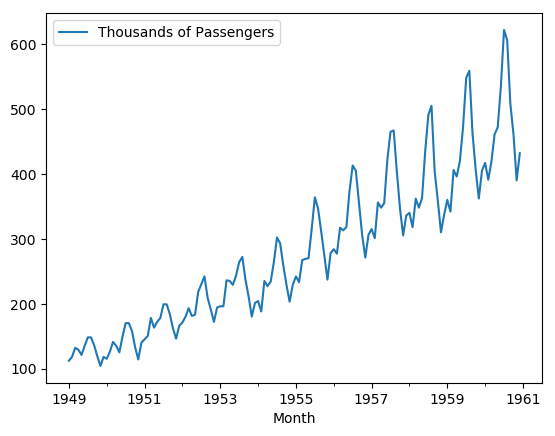

In [7]:
df_ns.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(df_ns['Thousands of Passengers'])

(0.8153688792060483,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
#help(adfuller)
dftest = adfuller(df_ns['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistic','p-value','# Lags Used','# Observations'])
dfout

ADF Test Statistic      0.815369
p-value                 0.991880
# Lags Used            13.000000
# Observations        130.000000
dtype: float64

In [11]:
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [12]:
def adf_test(series, title=''):
    print(f'Augmented D-F Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') #dropna to handle differenced data

    labels = ['ADF test statistic', 'p-value','# lags used', '# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val

    print(out.to_string()) #convert fom float64 to string

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and isstationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(df_ns['Thousands of Passengers'], title='Thousands of Passengers')

Augmented D-F Test: Thousands of Passengers
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


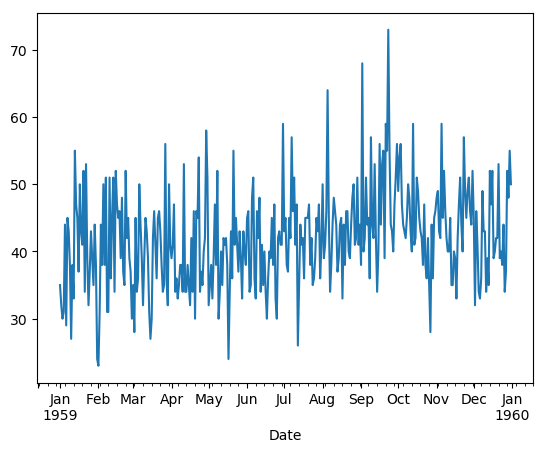

In [14]:
df_s['Births'].plot()

In [15]:
adf_test(df_s['Births'], title='Female Births')

Augmented D-F Test: Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and isstationary


In [16]:
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'

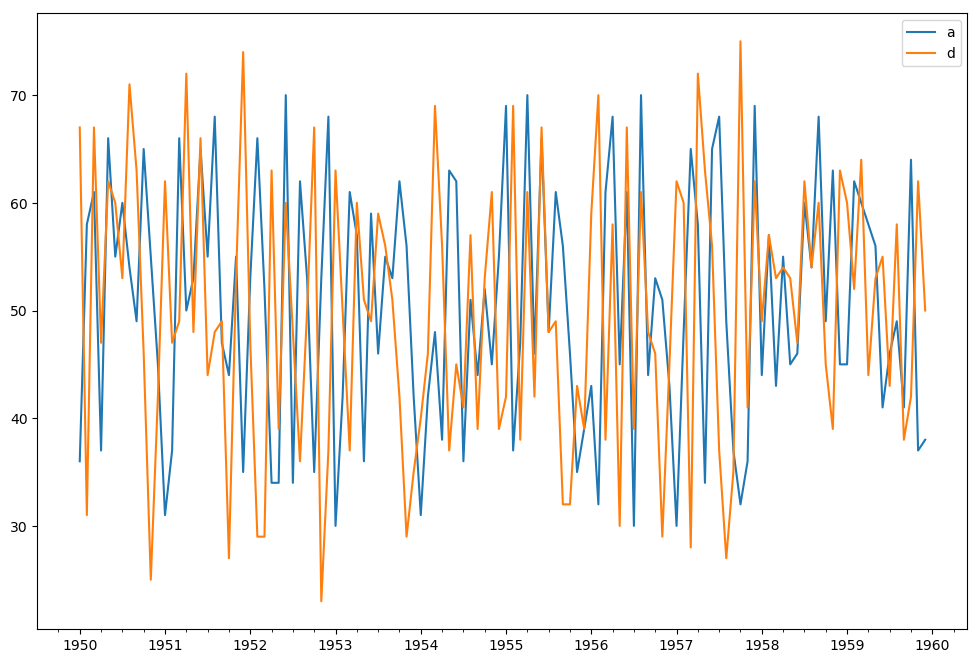

In [17]:
df3[['a','d']].plot(figsize=(12,8))

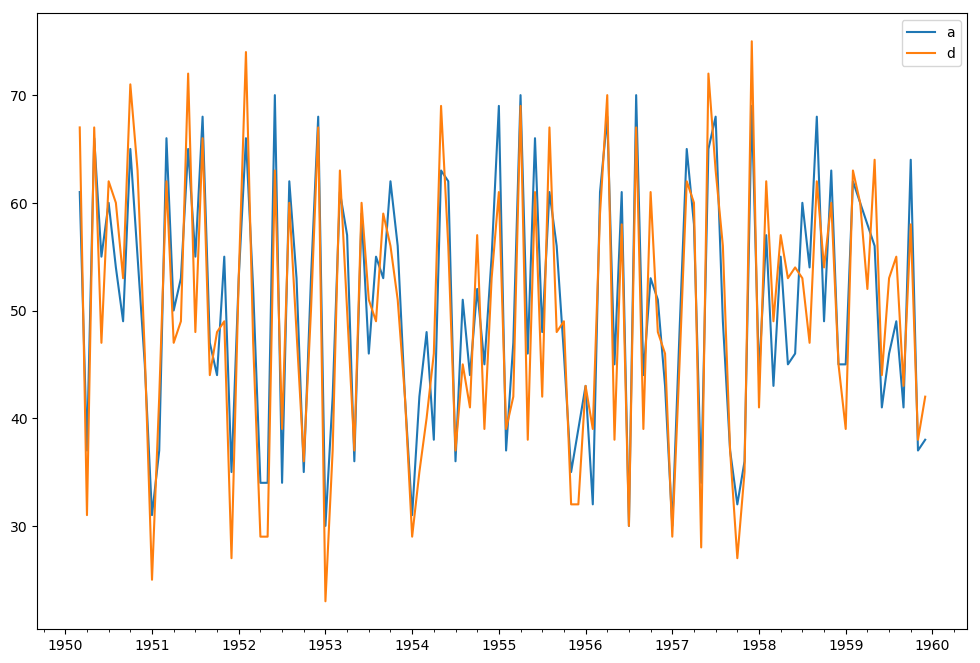

In [18]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(figsize=(12,8),legend=True)
#Indicates some causality between them

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

In [20]:
grangercausalitytests(df3[['a','d']], maxlag=3);
#Look for Low p-values < 0.05


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [21]:
grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [25]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


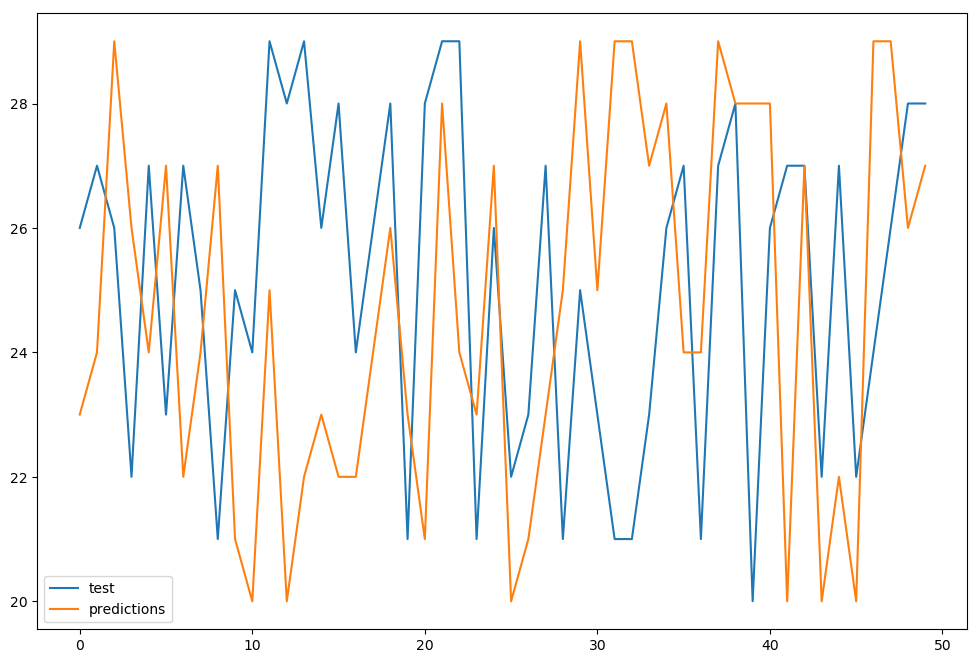

In [26]:
df.plot(figsize=(12,8))

In [27]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [28]:
mse(df['test'],df['predictions'])

17.02

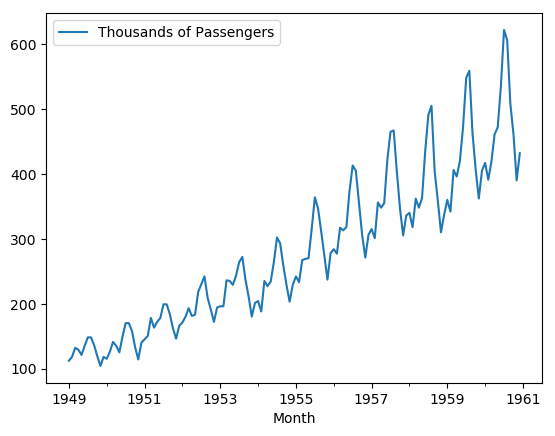

In [31]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.plot()

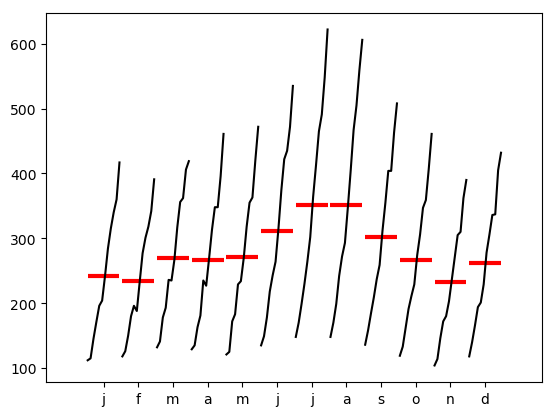

In [34]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(df['Thousands of Passengers']);

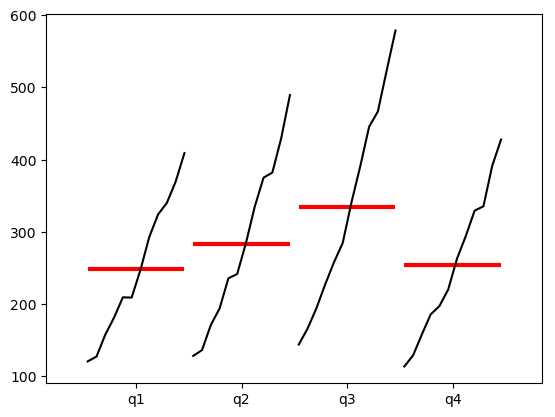

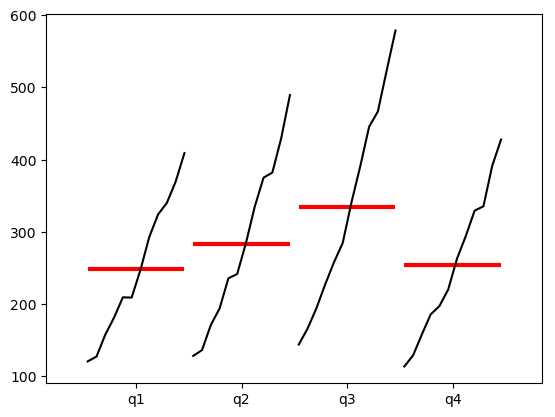

In [35]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq)